# Poisson Distribution

* Lecture 13: Poisson Distribution [Link](https://github.com/bcaffo/MathematicsBiostatisticsBootCamp2/blob/master/lecture13.pdf)

* Poisson distribution is a discrete distribution that models the number of events/observations per time/area/volume etc.
* λ is the expected count in the studied period of time (mean).
* Each value in the probability mass function represents the probability of observing a certain number of counts in the same period of time.
* The variance of the Poisson distribution is also λ

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from scipy.stats import poisson, norm

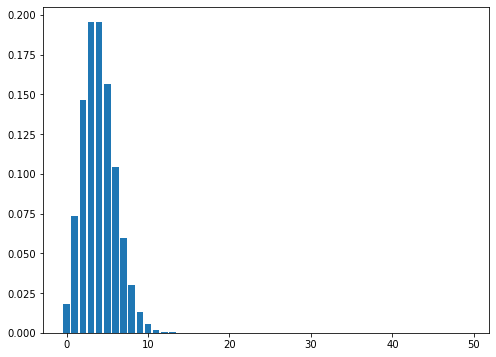

In [2]:
x = np.arange(0, 50)
y = poisson.pmf(x, 4)

plt.figure(figsize=(8, 6))
plt.bar(x, y)
plt.show()

### Lecture pump example

Dataframe including the number of failures recorded `n_fail` and the time of observation `time`

In [3]:
df = pd.DataFrame({
    'pump': np.arange(1, 11),
    'n_fail': [5, 1, 5, 14, 3, 19, 1, 1, 4, 22],
    'time': [94.32, 15.72, 62.88, 125.76, 5.24, 31.44, 1.05, 1.05, 2.1, 10.48]
})

Testing the hypothesis that, for the first pump, the number of failures per day is greater than 0.15 against the null hypothesis that states that the number of failures per day in the industry standard is 0.15.

This value follows an asymptotic standard normal distribution:
$$ \frac{X-\lambda \cdot t}{\sqrt{\lambda \cdot t}} $$

Where $X$ is the count of the observed events during the period $t$

In [4]:
# Pump 1
df.head(1)

,pump,n_fail,time
0,1,5,94.32


In [5]:
X = 5
t = 94.32
lmbda = X / t
lmbda_null = 0.15

stat = (X - lmbda_null * t) / np.sqrt(lmbda_null * t)

# P-value using the asymptotic normal distribution
p_val = 1 - norm.cdf(stat)

# Exact P-value using the Poisson distribution
p_val_exact = 1 - poisson.cdf(k=5, mu=lmbda_null*t)

print(f'Statistic: {stat}')
print(f'P-value: {p_val}')
print(f'Exact P-value: {p_val_exact}')

Statistic: -2.4320843344305105
P-value: 0.9924938942813274
Exact P-value: 0.9949940431594622


To compute a confidence interval for the observed lambda we use the lambda (mean) standard error $\sqrt{\frac{\lambda}{t}}$. The confidence interval would be:
$$ CI_{\text{95%}} = \hat{\lambda} \pm 1.96 \cdot \sqrt{\frac{\lambda}{t}} $$

In [6]:
# Confidence interval for the observed lambda
CI = lmbda + 1.96 * np.array([-1, 1]) * np.sqrt(lmbda / t)
print(f'CI (95%): {CI}')

CI (95%): [0.00654481 0.09947724]


Computing the p-values of every pump against the null hypothesis that the number of failures is 0.15 per day. Here we use a different poisson distribution for each case where the null hypothesis mean is the number of failures in the observed duration. (Null mean changes from pump to pump based on the observed duration)

**Note:**
* The poisson distribution is a discrete distribution of counts, i.e., values are integers. Although lambda may take any value.
* So to test whether the observed failures are likely under the poisson distribution, we create a distribution that has a mean equal to the rate of failure under the null hypothesis. Then, we look at the probability of observing the same number of failures that we observed during the observation time. 

In [7]:
lmbda_null = 0.15
df['n_fail_null'] = lmbda_null * df['time']
df['p_val'] = 1-poisson.cdf(k=df['n_fail'], mu=df['n_fail_null'])

In [8]:
df

,pump,n_fail,time,n_fail_null,p_val
0,1,5,94.32,14.1480,9.949940e-01
1,2,1,15.72,2.3580,6.823021e-01
2,3,5,62.88,9.4320,9.081362e-01
3,4,14,125.76,18.8640,8.431411e-01
4,5,3,5.24,0.7860,8.553342e-03
5,6,19,31.44,4.7160,1.399945e-07
6,7,1,1.05,0.1575,1.117459e-02
7,8,1,1.05,0.1575,1.117459e-02
8,9,4,2.10,0.3150,1.989776e-05
9,10,22,10.48,1.5720,0.000000e+00


### Comparing two rates
Here the rate of cases per person year for users and non-users (treatment and controls) is compared. We test the null hypothesis that both treatment and controls have the same rates.

In [9]:
# Data
df = pd.DataFrame({
    'No. Cases': [9, 239],
    'No. Person Years': [2935, 135130]
}, index=['Current users', 'Never users'])
df

,No. Cases,No. Person Years
Current users,9,2935
Never users,239,135130


In [10]:
from scipy.stats import chi2

In [11]:
# Lambda under the null hyypothesis
lmbda_null = (9 + 239) / (2935 + 135130)

# Chi2 test score
# Current users
E = lmbda_null * 2935 # Expected number of cases
O = 9 # Observed number of cases
TS = (E-O)**2 / E

# Never users
E = lmbda_null * 135130 # Expected number of cases
O = 239 # Observed number of cases
TS += (E-O)**2 / E

print(f'Test score: {TS}')
print(f'P-value: {1-chi2.cdf(TS, df=1)}')

Test score: 2.6934270108641556
P-value: 0.10076288732449068


### Plotting Poisson likelihood
Assuming we observed 5 failures of a nuclear pump in 94 days, plot the likelihood given that the pump failures are modelled using a Poisson distribution.

In [12]:
from scipy.stats import poisson

MLE: 0.053


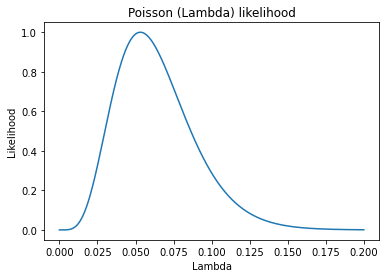

In [13]:
lmbda = np.linspace(0, 0.2, 500)
x = 5
t = 94


poisson_likelihood = (t*lmbda)**x * np.exp(-t*lmbda) / np.math.factorial(x)
# Using scipy's Poisson PMF function
# poisson_likelihood = poisson.pmf(k=5, mu=lmbda*t)

# Normalizing by dividing by the value corresponding to the MLE
mle_val = poisson.pmf(k=5, mu=5)

plt.plot(lmbda, poisson_likelihood/mle_val)



print(f'MLE: {x/t:.3f}')
plt.title('Poisson (Lambda) likelihood')
plt.xlabel('Lambda')
plt.ylabel('Likelihood')
plt.show()